# **Assignment 1**

MSDS 422 

Jamia Russell

# **Data Import and Cleaning**

**Read Data Into Python**

In [3]:
#import necessary libraries/packages for data review and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#remove display limits 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


#read into dataframe
df=pd.read_csv('C:\\Users\\jamia\\MSDS 422\\HMEQ_Loss.csv')

#display first 5 rows of the dataframe
print(df.head())

   TARGET_BAD_FLAG  TARGET_LOSS_AMT  LOAN  MORTDUE     VALUE   REASON     JOB  \
0                1            641.0  1100  25860.0   39025.0  HomeImp   Other   
1                1           1109.0  1300  70053.0   68400.0  HomeImp   Other   
2                1            767.0  1500  13500.0   16700.0  HomeImp   Other   
3                1           1425.0  1500      NaN       NaN      NaN     NaN   
4                0              NaN  1700  97800.0  112000.0  HomeImp  Office   

    YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  DEBTINC  
0  10.5    0.0     0.0   94.366667   1.0   9.0      NaN  
1   7.0    0.0     2.0  121.833333   0.0  14.0      NaN  
2   4.0    0.0     0.0  149.466667   1.0  10.0      NaN  
3   NaN    NaN     NaN         NaN   NaN   NaN      NaN  
4   3.0    0.0     0.0   93.333333   0.0  14.0      NaN  


In [4]:
dfsummary = df.describe(include= 'all')
print(dfsummary)

        TARGET_BAD_FLAG  TARGET_LOSS_AMT          LOAN        MORTDUE  \
count       5960.000000      1189.000000   5960.000000    5442.000000   
unique              NaN              NaN           NaN            NaN   
top                 NaN              NaN           NaN            NaN   
freq                NaN              NaN           NaN            NaN   
mean           0.199497     13414.576955  18607.969799   73760.817200   
std            0.399656     10839.455965  11207.480417   44457.609458   
min            0.000000       224.000000   1100.000000    2063.000000   
25%            0.000000      5639.000000  11100.000000   46276.000000   
50%            0.000000     11003.000000  16300.000000   65019.000000   
75%            0.000000     17634.000000  23300.000000   91488.000000   
max            1.000000     78987.000000  89900.000000  399550.000000   

                VALUE   REASON    JOB          YOJ        DEROG       DELINQ  \
count     5848.000000     5708   5681  5445

In [5]:
missing = df.isnull().sum()
print(missing)

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
dtype: int64


In [6]:
#removing duplicate rows
cleandf1= df.drop_duplicates(keep=False)
cleandf1.count()

TARGET_BAD_FLAG    5960
TARGET_LOSS_AMT    1189
LOAN               5960
MORTDUE            5442
VALUE              5848
REASON             5708
JOB                5681
YOJ                5445
DEROG              5252
DELINQ             5380
CLAGE              5652
NINQ               5450
CLNO               5738
DEBTINC            4693
dtype: int64

**Analyis by Profession**

In [7]:
#Flagged defaults on accounts by Profession
cleandf1.groupby(cleandf1.JOB)['TARGET_BAD_FLAG'].sum()

JOB
Mgr        179
Office     125
Other      554
ProfExe    212
Sales       38
Self        58
Name: TARGET_BAD_FLAG, dtype: int64

In [8]:
#Total Loss Amount by Profession
cleandf1.groupby(cleandf1.JOB)['TARGET_LOSS_AMT'].sum()

JOB
Mgr        2531335.0
Office     1684413.0
Other      6409837.0
ProfExe    3108125.0
Sales       624015.0
Self       1289477.0
Name: TARGET_LOSS_AMT, dtype: float64

In [9]:
'These output tells us Other, Managers, and Office Workers have the highest loss amount  and defaults on loans among the professions. This may be due to being approved for high loan amounts'
'with the thought of a steady income. This can cause individuals to overestimate what they are able to pay. In addition, job security is not guaranteed'
'this could be a result of lay-offs'

'this could be a result of lay-offs'

In [10]:
#Total Loan by Profession
cleandf1.groupby(cleandf1.JOB)['LOAN'].sum()

JOB
Mgr        14692100
Office     17199200
Other      43131300
ProfExe    24222900
Sales       1625600
Self        5464700
Name: LOAN, dtype: int64

**Data Types & Index Creation**

In [11]:
#find data types
dt = cleandf1.dtypes

objList = []
intList = []
floatList = []

for i in dt.index:
    print("here is i .....",i,"....and here is the type", dt[i]) 

here is i ..... TARGET_BAD_FLAG ....and here is the type int64
here is i ..... TARGET_LOSS_AMT ....and here is the type float64
here is i ..... LOAN ....and here is the type int64
here is i ..... MORTDUE ....and here is the type float64
here is i ..... VALUE ....and here is the type float64
here is i ..... REASON ....and here is the type object
here is i ..... JOB ....and here is the type object
here is i ..... YOJ ....and here is the type float64
here is i ..... DEROG ....and here is the type float64
here is i ..... DELINQ ....and here is the type float64
here is i ..... CLAGE ....and here is the type float64
here is i ..... NINQ ....and here is the type float64
here is i ..... CLNO ....and here is the type float64
here is i ..... DEBTINC ....and here is the type float64


In [12]:
FLAG = 'TARGET_BAD_FLAG'
LOSS = 'TARGET_LOSS_AMT'

#index columns by data type

for i in dt.index:
    if i in ( [FLAG,LOSS]) : continue
    if dt[i] in (['object']) : objList.append( i )
    if dt[i] in (['float64']) : floatList.append( i )
    if dt[i] in (['int64']) : intList.append( i )

print("objects")
print("-------")
for i in objList : 
    print(i)

print("integer")
print("-------")
for i in intList : 
    print(i)
#
#
print("float")
print("-------")
for i in floatList : 
    print(i)

objects
-------
REASON
JOB
integer
-------
LOAN
float
-------
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [13]:
print ("objects")
print("---------------")
for i in objList :
    print( "Class =", i)
    print(cleandf1[i].unique())
    print("-------------------")


objects
---------------
Class = REASON
['HomeImp' nan 'DebtCon']
-------------------
Class = JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
-------------------


**Null/Missing Values for Object List**

In [14]:
#view most common and null values
for i in objList :
    print(i)
    print(cleandf1[i].unique())
    g=cleandf1.groupby(i)
    print(g[i].count())
    print("MOST COMMON =", cleandf1[i].mode()[0])
    print ("NULL =", cleandf1[i].isnull().sum())
    print('###########################################')

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON = DebtCon
NULL = 252
###########################################
JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON = Other
NULL = 279
###########################################


**Null Value Imputing**

In [15]:
#impute columns with missing values
#fill imputed null values with "missing"
#drop old column

for i in objList:
    if cleandf1[i].isna().sum() == 0:
        continue
    NAME = "IMP_" + i
    print(NAME)
    print("HAS MISSING")
    print("----------------------------")
    cleandf1[NAME] = cleandf1[i]
    cleandf1[NAME] = cleandf1[NAME].fillna("MISSING")
    g = cleandf1.groupby(NAME)
    print(g[NAME].count())
    cleandf1 = cleandf1.drop(i,axis=1) #drops the original variable 
    

IMP_REASON
HAS MISSING
----------------------------
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64
IMP_JOB
HAS MISSING
----------------------------
IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64


In [16]:
#checking work, the new columns do not have null values and the old columns were dropped
missing = cleandf1.isnull().sum()
print(missing)

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
IMP_REASON            0
IMP_JOB               0
dtype: int64


**Data Analysis - Object Data Type (REASON, JOB)**

In [17]:
dt = cleandf1.dtypes

objList = []
intList = []
floatList = []

for i in dt.index:
    print("here is i .....",i,"....and here is the type", dt[i]) 

here is i ..... TARGET_BAD_FLAG ....and here is the type int64
here is i ..... TARGET_LOSS_AMT ....and here is the type float64
here is i ..... LOAN ....and here is the type int64
here is i ..... MORTDUE ....and here is the type float64
here is i ..... VALUE ....and here is the type float64
here is i ..... YOJ ....and here is the type float64
here is i ..... DEROG ....and here is the type float64
here is i ..... DELINQ ....and here is the type float64
here is i ..... CLAGE ....and here is the type float64
here is i ..... NINQ ....and here is the type float64
here is i ..... CLNO ....and here is the type float64
here is i ..... DEBTINC ....and here is the type float64
here is i ..... IMP_REASON ....and here is the type object
here is i ..... IMP_JOB ....and here is the type object


In [18]:
FLAG = 'TARGET_BAD_FLAG'
LOSS = 'TARGET_LOSS_AMT'

#index columns by data type

for i in dt.index:
    if i in ( [FLAG,LOSS]) : continue
    if dt[i] in (['object']) : objList.append( i )
    if dt[i] in (['float64']) : floatList.append( i )
    if dt[i] in (['int64']) : intList.append( i )

print("objects")
print("-------")
for i in objList : 
    print(i)

print("integer")
print("-------")
for i in intList : 
    print(i)
#
#
print("float")
print("-------")
for i in floatList : 
    print(i)

objects
-------
IMP_REASON
IMP_JOB
integer
-------
LOAN
float
-------
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [19]:
#Data Exploration
for i in objList :
    print("Class = ", i)
    g = cleandf1.groupby( i )
    x = g[FLAG].mean()
    print("FLAG Prob", x)
    print("................")
    x = g[LOSS].mean()
    print("Avg Loss Amount",x)
    print("#########################")     

Class =  IMP_REASON
FLAG Prob IMP_REASON
DebtCon    0.189664
HomeImp    0.222472
MISSING    0.190476
Name: TARGET_BAD_FLAG, dtype: float64
................
Avg Loss Amount IMP_REASON
DebtCon    16005.163758
HomeImp     8388.090909
MISSING    14675.020833
Name: TARGET_LOSS_AMT, dtype: float64
#########################
Class =  IMP_JOB
FLAG Prob IMP_JOB
MISSING    0.082437
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
................
Avg Loss Amount IMP_JOB
MISSING    13162.173913
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64
#########################


'The highest probability out of the provided reasons for a default outcome is Home Improvement. The highest average loss amount comes
'from debst consolidation. This tracks with the unpredictability of the tasks. Homeowners may encounter problems they
'had not known of which can prove to be more expensive than they can afford to pay. Those who have to consolidate debt choose to
'often to avoid looming interest and because they do not have the money to pay leading to loss.'

'The highest probability of a default outcome comes from the Sales profession. Again, this comes from the instability and 
'inconsistency of monthly income. There are slow seasons that lower possible commission and base pay is often well below 
'what is sustainable for living expenses and loans. Similar sentiments for self employed individuals, they also 
'have a greater tax burdern.'

In [20]:
#Average Loan Amount by Reason and Job

LOAN = 'LOAN'

for i in objList :
    print("Class = ", i)
    g = cleandf1.groupby( i )
    x = g[LOAN].mean()
    print("FLAG Prob", x)
    print("................")

Class =  IMP_REASON
FLAG Prob IMP_REASON
DebtCon    19952.953157
HomeImp    16006.629213
MISSING    16017.857143
Name: LOAN, dtype: float64
................
Class =  IMP_JOB
FLAG Prob IMP_JOB
MISSING    16371.684588
Mgr        19155.280313
Office     18142.616034
Other      18061.683417
ProfExe    18983.463950
Sales      14913.761468
Self       28314.507772
Name: LOAN, dtype: float64
................


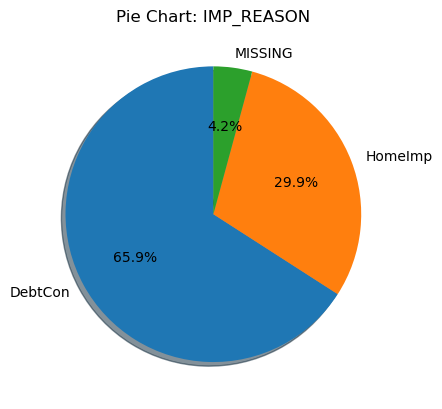

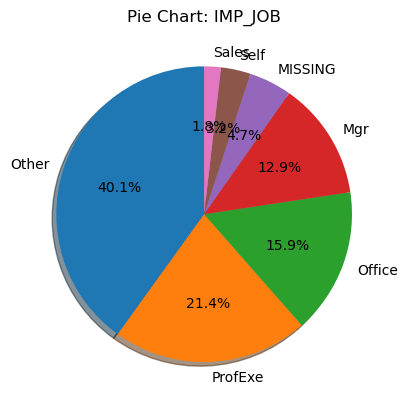

In [21]:
#pie chart
for i in objList :
    x = cleandf1[i].value_counts(dropna=False)
    theLabels = x.axes[0].tolist()
    theSlices = list(x)
    plt.pie( theSlices,
            labels=theLabels,
            startangle = 90,
            shadow=True,
            autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

**One Hot Encoding - JOB and REASON**

In [22]:
#correct one hot encoding - REASON
cleandf1["OHE_REASON_HOMEIMP"] = cleandf1["IMP_REASON"].isin(["HomeImp"])+0
cleandf1["OHE_REASON_DEBTCON"] = cleandf1["IMP_REASON"].isin(["DebtCon"])+0
cleandf1["OHE_REASON_MISSING"] = cleandf1["IMP_REASON"].isin(["MISSING"])+0

cleandf1 = cleandf1.drop("IMP_REASON",axis=1)

print(cleandf1.head(3).T)

                            0           1           2
TARGET_BAD_FLAG             1           1           1
TARGET_LOSS_AMT         641.0      1109.0       767.0
LOAN                     1100        1300        1500
MORTDUE               25860.0     70053.0     13500.0
VALUE                 39025.0     68400.0     16700.0
YOJ                      10.5         7.0         4.0
DEROG                     0.0         0.0         0.0
DELINQ                    0.0         2.0         0.0
CLAGE               94.366667  121.833333  149.466667
NINQ                      1.0         0.0         1.0
CLNO                      9.0        14.0        10.0
DEBTINC                   NaN         NaN         NaN
IMP_JOB                 Other       Other       Other
OHE_REASON_HOMEIMP          1           1           1
OHE_REASON_DEBTCON          0           0           0
OHE_REASON_MISSING          0           0           0


In [23]:
#OHE for Jobs

cleandf1["OHE_JOB_OFFICE"] = cleandf1["IMP_JOB"].isin(["Office"])+0
cleandf1["OHE_JOB_OTHER"] = cleandf1["IMP_JOB"].isin(["Other"])+0
cleandf1["OHE_JOB_MGR"] = cleandf1["IMP_JOB"].isin(["Mgr"])+0
cleandf1["OHE_JOB_PROFEXEC"]= cleandf1["IMP_JOB"].isin(["ProfExec"])+0
cleandf1["OHE_JOB_SALES"] = cleandf1["IMP_JOB"].isin(["Sales"])+0

cleandf1 = cleandf1.drop("IMP_JOB",axis=1)

print(cleandf1.head(3).T)

                               0             1             2
TARGET_BAD_FLAG         1.000000      1.000000      1.000000
TARGET_LOSS_AMT       641.000000   1109.000000    767.000000
LOAN                 1100.000000   1300.000000   1500.000000
MORTDUE             25860.000000  70053.000000  13500.000000
VALUE               39025.000000  68400.000000  16700.000000
YOJ                    10.500000      7.000000      4.000000
DEROG                   0.000000      0.000000      0.000000
DELINQ                  0.000000      2.000000      0.000000
CLAGE                  94.366667    121.833333    149.466667
NINQ                    1.000000      0.000000      1.000000
CLNO                    9.000000     14.000000     10.000000
DEBTINC                      NaN           NaN           NaN
OHE_REASON_HOMEIMP      1.000000      1.000000      1.000000
OHE_REASON_DEBTCON      0.000000      0.000000      0.000000
OHE_REASON_MISSING      0.000000      0.000000      0.000000
OHE_JOB_OFFICE          

**Integer List**

In [24]:
missing = cleandf1.isnull().sum()
print(missing)

TARGET_BAD_FLAG          0
TARGET_LOSS_AMT       4771
LOAN                     0
MORTDUE                518
VALUE                  112
YOJ                    515
DEROG                  708
DELINQ                 580
CLAGE                  308
NINQ                   510
CLNO                   222
DEBTINC               1267
OHE_REASON_HOMEIMP       0
OHE_REASON_DEBTCON       0
OHE_REASON_MISSING       0
OHE_JOB_OFFICE           0
OHE_JOB_OTHER            0
OHE_JOB_MGR              0
OHE_JOB_PROFEXEC         0
OHE_JOB_SALES            0
dtype: int64


In [25]:
#Probability of FLAG default on Loan(int) and loss amount correlation
for i in intList :
    print("Variable:", i)
    g=cleandf1.groupby(FLAG)
    x=g[i].mean()
    print("FLAG Prob", x)
    c=cleandf1[i].corr(cleandf1[LOSS])
    c=round(100*c,10)
    print("Loss Amount Correlation:",c, "%")

Variable: LOAN
FLAG Prob TARGET_BAD_FLAG
0    19028.107315
1    16922.119428
Name: LOAN, dtype: float64
Loss Amount Correlation: 83.7056645044 %


"The average loan amount for non-defaults is higher compared to defaults. Suggesting defaulted loans compared to non-defaulted tend to be' 
'are smaller on average. There is an 83 percent correlation betwee loan amount and loss amount which is logical.'

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-package

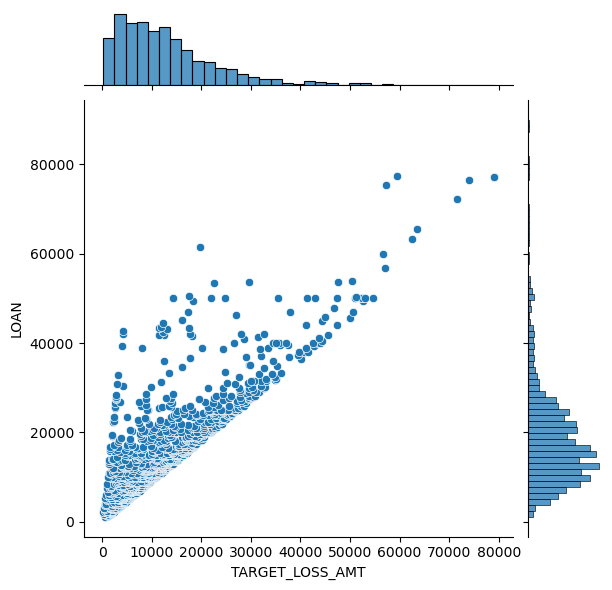

In [26]:
#disrtibution of loss amount vs. loan 
sns.jointplot(data=cleandf1, x="TARGET_LOSS_AMT", y="LOAN")

**Flag Variables for Float List**

In [27]:
#creating flag list and imputing missing values
for i in floatList :
    #print(i)
    if cleandf1[i].isna().sum() == 0 : continue
    print(i)
    FLAG = "M_" + i
    IMP = "IMP_" + i
    print( FLAG )
    print( IMP )
    cleandf1[ FLAG ] = cleandf1[i].isna() + 0
    cleandf1[ IMP ] = cleandf1[ i ]
    cleandf1.loc[ cleandf1[IMP].isna(), IMP ] = cleandf1[i].median()
    cleandf1 = cleandf1.drop( i, axis=1 )


print(cleandf1.head(3).T)

MORTDUE
M_MORTDUE
IMP_MORTDUE
VALUE
M_VALUE
IMP_VALUE
YOJ
M_YOJ
IMP_YOJ
DEROG
M_DEROG
IMP_DEROG
DELINQ
M_DELINQ
IMP_DELINQ
CLAGE
M_CLAGE
IMP_CLAGE
NINQ
M_NINQ
IMP_NINQ
CLNO
M_CLNO
IMP_CLNO
DEBTINC
M_DEBTINC
IMP_DEBTINC
                               0             1             2
TARGET_BAD_FLAG         1.000000      1.000000      1.000000
TARGET_LOSS_AMT       641.000000   1109.000000    767.000000
LOAN                 1100.000000   1300.000000   1500.000000
OHE_REASON_HOMEIMP      1.000000      1.000000      1.000000
OHE_REASON_DEBTCON      0.000000      0.000000      0.000000
OHE_REASON_MISSING      0.000000      0.000000      0.000000
OHE_JOB_OFFICE          0.000000      0.000000      0.000000
OHE_JOB_OTHER           1.000000      1.000000      1.000000
OHE_JOB_MGR             0.000000      0.000000      0.000000
OHE_JOB_PROFEXEC        0.000000      0.000000      0.000000
OHE_JOB_SALES           0.000000      0.000000      0.000000
M_MORTDUE               0.000000      0.000000   

In [28]:
#checking work
missing = cleandf1.isnull().sum()
print(missing)

TARGET_BAD_FLAG          0
TARGET_LOSS_AMT       4771
LOAN                     0
OHE_REASON_HOMEIMP       0
OHE_REASON_DEBTCON       0
OHE_REASON_MISSING       0
OHE_JOB_OFFICE           0
OHE_JOB_OTHER            0
OHE_JOB_MGR              0
OHE_JOB_PROFEXEC         0
OHE_JOB_SALES            0
M_MORTDUE                0
IMP_MORTDUE              0
M_VALUE                  0
IMP_VALUE                0
M_YOJ                    0
IMP_YOJ                  0
M_DEROG                  0
IMP_DEROG                0
M_DELINQ                 0
IMP_DELINQ               0
M_CLAGE                  0
IMP_CLAGE                0
M_NINQ                   0
IMP_NINQ                 0
M_CLNO                   0
IMP_CLNO                 0
M_DEBTINC                0
IMP_DEBTINC              0
dtype: int64


In [29]:
print(cleandf1.describe().T)

                     count           mean           std          min  \
TARGET_BAD_FLAG     5960.0       0.199497      0.399656     0.000000   
TARGET_LOSS_AMT     1189.0   13414.576955  10839.455965   224.000000   
LOAN                5960.0   18607.969799  11207.480417  1100.000000   
OHE_REASON_HOMEIMP  5960.0       0.298658      0.457708     0.000000   
OHE_REASON_DEBTCON  5960.0       0.659060      0.474065     0.000000   
OHE_REASON_MISSING  5960.0       0.042282      0.201248     0.000000   
OHE_JOB_OFFICE      5960.0       0.159060      0.365763     0.000000   
OHE_JOB_OTHER       5960.0       0.400671      0.490076     0.000000   
OHE_JOB_MGR         5960.0       0.128691      0.334886     0.000000   
OHE_JOB_PROFEXEC    5960.0       0.000000      0.000000     0.000000   
OHE_JOB_SALES       5960.0       0.018289      0.134004     0.000000   
M_MORTDUE           5960.0       0.086913      0.281731     0.000000   
IMP_MORTDUE         5960.0   73001.041812  42552.726779  2063.00

**Data Analysis Float List**

In [30]:
dt = cleandf1.dtypes

objList = []
intList = []
floatList = []

for i in dt.index:
    print("here is i .....",i,"....and here is the type", dt[i]) 

here is i ..... TARGET_BAD_FLAG ....and here is the type int64
here is i ..... TARGET_LOSS_AMT ....and here is the type float64
here is i ..... LOAN ....and here is the type int64
here is i ..... OHE_REASON_HOMEIMP ....and here is the type int32
here is i ..... OHE_REASON_DEBTCON ....and here is the type int32
here is i ..... OHE_REASON_MISSING ....and here is the type int32
here is i ..... OHE_JOB_OFFICE ....and here is the type int32
here is i ..... OHE_JOB_OTHER ....and here is the type int32
here is i ..... OHE_JOB_MGR ....and here is the type int32
here is i ..... OHE_JOB_PROFEXEC ....and here is the type int32
here is i ..... OHE_JOB_SALES ....and here is the type int32
here is i ..... M_MORTDUE ....and here is the type int32
here is i ..... IMP_MORTDUE ....and here is the type float64
here is i ..... M_VALUE ....and here is the type int32
here is i ..... IMP_VALUE ....and here is the type float64
here is i ..... M_YOJ ....and here is the type int32
here is i ..... IMP_YOJ ....an

In [31]:
FLAG = 'TARGET_BAD_FLAG'
LOSS = 'TARGET_LOSS_AMT'

#index columns by data type

for i in dt.index:
    if i in ( [FLAG,LOSS]) : continue
    if dt[i] in (['object']) : objList.append( i )
    if dt[i] in (['float64']) : floatList.append( i )
    if dt[i] in (['int64']) : intList.append( i )


print("float")
print("-------")
for i in floatList : 
    print(i)

float
-------
IMP_MORTDUE
IMP_VALUE
IMP_YOJ
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_CLNO
IMP_DEBTINC


In [32]:
for i in floatList :
    print("Variable = ", i)
    g = cleandf1.groupby(FLAG)
    x = g[i].mean()
    print("FLAG Prob", x)
    c = cleandf1[i].corr(cleandf1[LOSS])
    c = round(100*c, 1)
    print("Loss Correllation =", c, "%")
    print("#########################")

Variable =  IMP_MORTDUE
FLAG Prob TARGET_BAD_FLAG
0    73982.084391
1    69064.495013
Name: IMP_MORTDUE, dtype: float64
Loss Correllation = 33.1 %
#########################
Variable =  IMP_VALUE
FLAG Prob TARGET_BAD_FLAG
0    102576.318640
1     97383.593616
Name: IMP_VALUE, dtype: float64
Loss Correllation = 34.5 %
#########################
Variable =  IMP_YOJ
FLAG Prob TARGET_BAD_FLAG
0    8.951687
1    7.971615
Name: IMP_YOJ, dtype: float64
Loss Correllation = 1.8 %
#########################
Variable =  IMP_DEROG
FLAG Prob TARGET_BAD_FLAG
0    0.116747
1    0.656013
Name: IMP_DEROG, dtype: float64
Loss Correllation = 9.3 %
#########################
Variable =  IMP_DELINQ
FLAG Prob TARGET_BAD_FLAG
0    0.219032
1    1.154752
Name: IMP_DELINQ, dtype: float64
Loss Correllation = 23.0 %
#########################
Variable =  IMP_CLAGE
FLAG Prob TARGET_BAD_FLAG
0    186.349827
1    151.717152
Name: IMP_CLAGE, dtype: float64
Loss Correllation = 0.5 %
#########################
Variable =  I

'Those who have delinquent and derogatory marks on credit, an oustanding mortgage balance and owe a lot to value of home '
'show a more significant difference between defaults and non-defaults. Credit lines, home value have a strong relationship'
'with loss amount suggesting that individuals are taking on more than they are able. However, individuals who have'
'remained employed and have longstanding credit history have a lower average loss amount.'

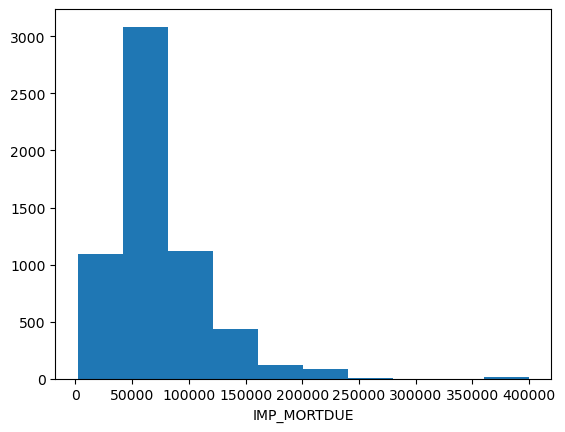

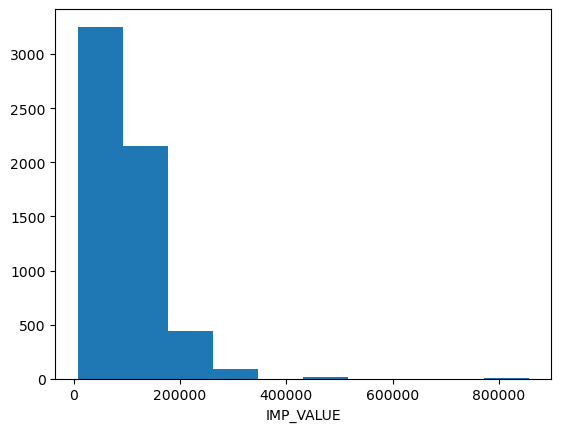

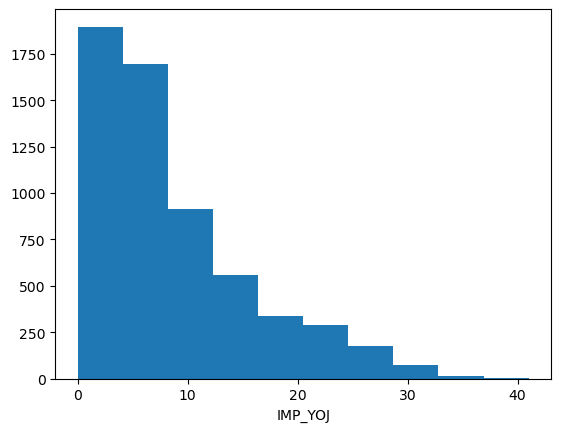

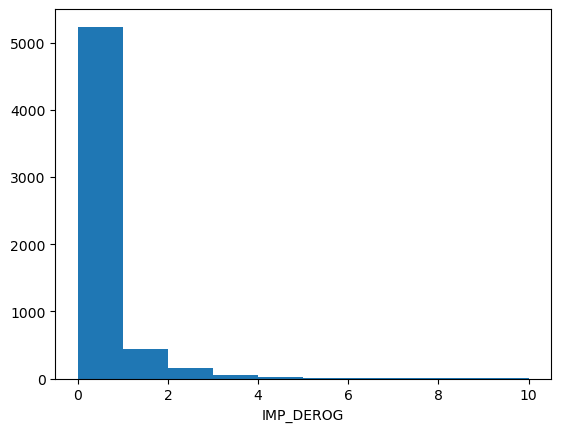

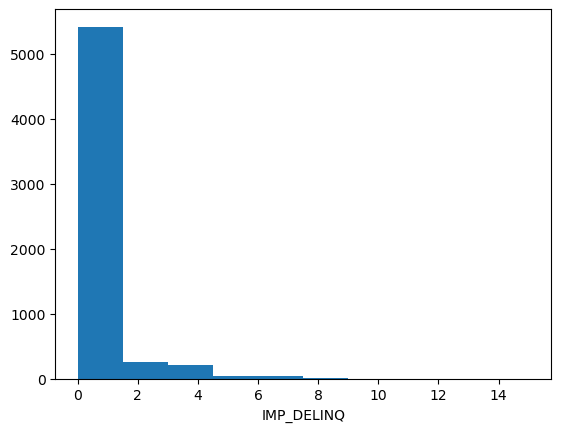

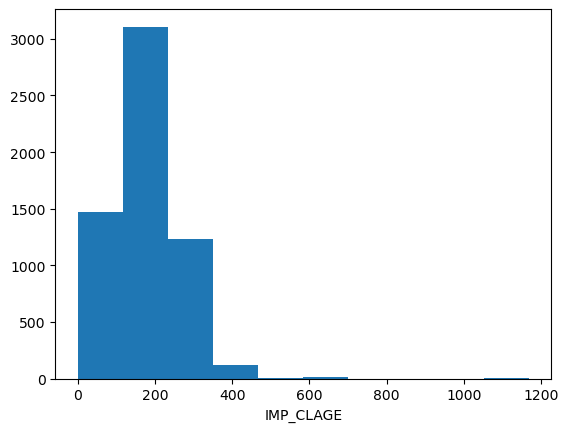

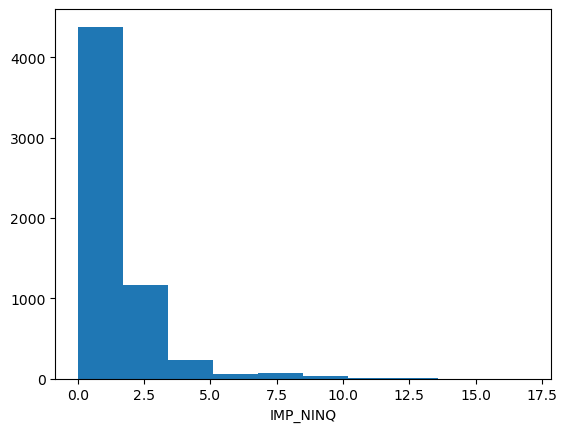

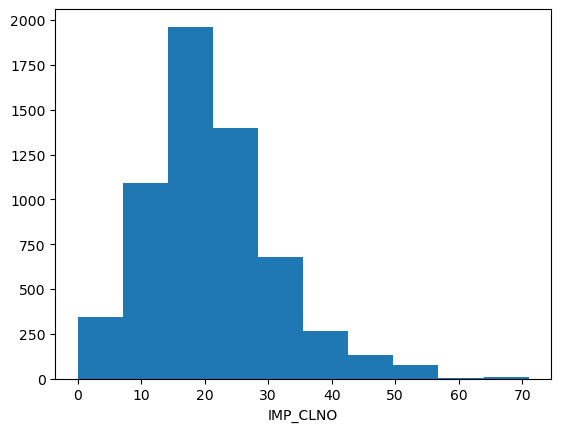

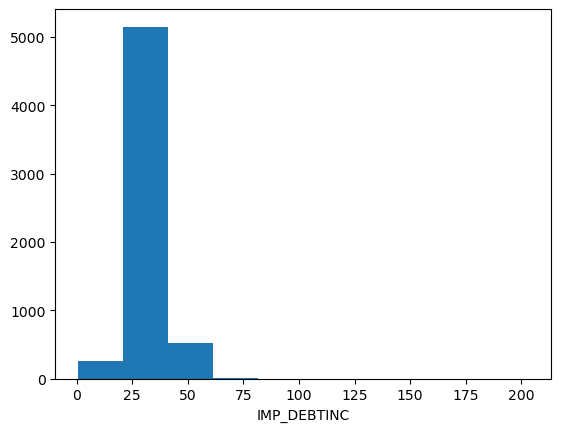

In [33]:
for i in floatList :
    plt.hist(cleandf1[i])
    plt.xlabel(i)
    plt.show()

In [35]:
print(cleandf1.head().T)

                               0             1             2             3  \
TARGET_BAD_FLAG         1.000000      1.000000      1.000000      1.000000   
TARGET_LOSS_AMT       641.000000   1109.000000    767.000000   1425.000000   
LOAN                 1100.000000   1300.000000   1500.000000   1500.000000   
OHE_REASON_HOMEIMP      1.000000      1.000000      1.000000      0.000000   
OHE_REASON_DEBTCON      0.000000      0.000000      0.000000      0.000000   
OHE_REASON_MISSING      0.000000      0.000000      0.000000      1.000000   
OHE_JOB_OFFICE          0.000000      0.000000      0.000000      0.000000   
OHE_JOB_OTHER           1.000000      1.000000      1.000000      0.000000   
OHE_JOB_MGR             0.000000      0.000000      0.000000      0.000000   
OHE_JOB_PROFEXEC        0.000000      0.000000      0.000000      0.000000   
OHE_JOB_SALES           0.000000      0.000000      0.000000      0.000000   
M_MORTDUE               0.000000      0.000000      0.000000    

In [37]:
cleandf1.to_excel("cleandf1", index=False)

ValueError: No engine for filetype: ''